**KATERINE LISBETH RAFAEL BOURDIERD 2022-0088**


**Modelo de aprendizaje automático que pueda clasificar perros y gatos**

**EN PRIMER LUGAR HICE UNA DIVISION ENTRE "Cats" y "Dogs"**

In [18]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as ply
import cv2

import os

cats = []
dogs = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        if "Dog" in filepath:
            dogs.append(filepath)
        elif "Cat" in filepath:
            cats.append(filepath)


**DIVISION DE LOS CONJUNTOS DE TRAIN Y TEST**

Lugar de referencia: [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html](http://)

In [81]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# División en conjuntos de TRAIN y TEST
cats_train, cats_test = train_test_split(cats, test_size=0.2, random_state=42)
dogs_train, dogs_test = train_test_split(dogs, test_size=0.2, random_state=42)

# Union de los trains y los tests
train_set = cats_train + dogs_train
test_set = cats_test + dogs_test

# Visualización
print("train", len(train_set))
print("test", len(test_set))

train 20000
test 5002


**ASIGNACION DEL TAMAÑO DE LAS IMAGENES Y LA CREACION DEL MODELO**

In [82]:
from tensorflow.keras import models, layers

# Creación del modelo de entrenamiento
model = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Cambiado a una sola neurona y activación sigmoide para clasificación binaria
])


In [85]:
# Fase de Entrenamiento
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**PREPROCESAMIENTO DE LA IMAGENES**

[https://www.tensorflow.org/tutorials/load_data/images?hl=es-419](http://)

[https://www.section.io/engineering-education/image-preprocessing-in-python/](http://)

In [86]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_images(filepaths, limit=None):
    images = []
    labels = []
    
    for filepath in filepaths[:limit]:
        try:
            img = load_img(filepath, target_size=(128, 128)) #Tamaño de la imagenes 
            img_array = img_to_array(img)
            img_array /= 255.0 
            
            images.append(img_array)
            
            # Todo lo que es ¨cat¨es 0 y todo lo que es ¨dog¨ es 1
            label = 0 if "Cat" in filepath else 1
            labels.append(label)
            
        except (IOError, SyntaxError):
            continue
    
    return np.array(images), np.array(labels)

# Asignacion de los resultados obtenidos
train_images, train_labels = load_and_preprocess_images(train_set)
test_images, test_labels = load_and_preprocess_images(test_set)

# Modelo :p
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
625/625 [==============================] - 29s 45ms/step - loss: 0.8645 - accuracy: 0.5546
Epoch 2/20
625/625 [==============================] - 29s 46ms/step - loss: 0.6758 - accuracy: 0.5779
Epoch 3/20
625/625 [==============================] - 30s 48ms/step - loss: 0.6773 - accuracy: 0.5760
Epoch 4/20
625/625 [==============================] - 31s 50ms/step - loss: 0.6671 - accuracy: 0.5929
Epoch 5/20
625/625 [==============================] - 31s 50ms/step - loss: 0.6690 - accuracy: 0.5897
Epoch 6/20
625/625 [==============================] - 31s 49ms/step - loss: 0.6648 - accuracy: 0.5909
Epoch 7/20
625/625 [==============================] - 32s 51ms/step - loss: 0.6626 - accuracy: 0.5996
Epoch 8/20
625/625 [==============================] - 30s 48ms/step - loss: 0.6669 - accuracy: 0.5960
Epoch 9/20
625/625 [==============================] - 29s 46ms/step - loss: 0.6640 - accuracy: 0.6004
Epoch 10/20
625/625 [==============================] - 30s 48ms/step - loss: 0.664

In [87]:
#Predecir

predic = model.predict(test_images)

157/157 [==============================] - 1s 9ms/step


**CONFIRMACION**

In [95]:
train_labels

array([0, 0, 0, ..., 1, 1, 1])

In [96]:
counts = np.bincount(train_labels)
count_cats = counts[0]
count_dogs = counts[1]

print("Cantidad de gatos (etiqueta 0):", count_cats)
print("Cantidad de perros (etiqueta 1):", count_dogs)


Cantidad de gatos (etiqueta 0): 9999
Cantidad de perros (etiqueta 1): 9999


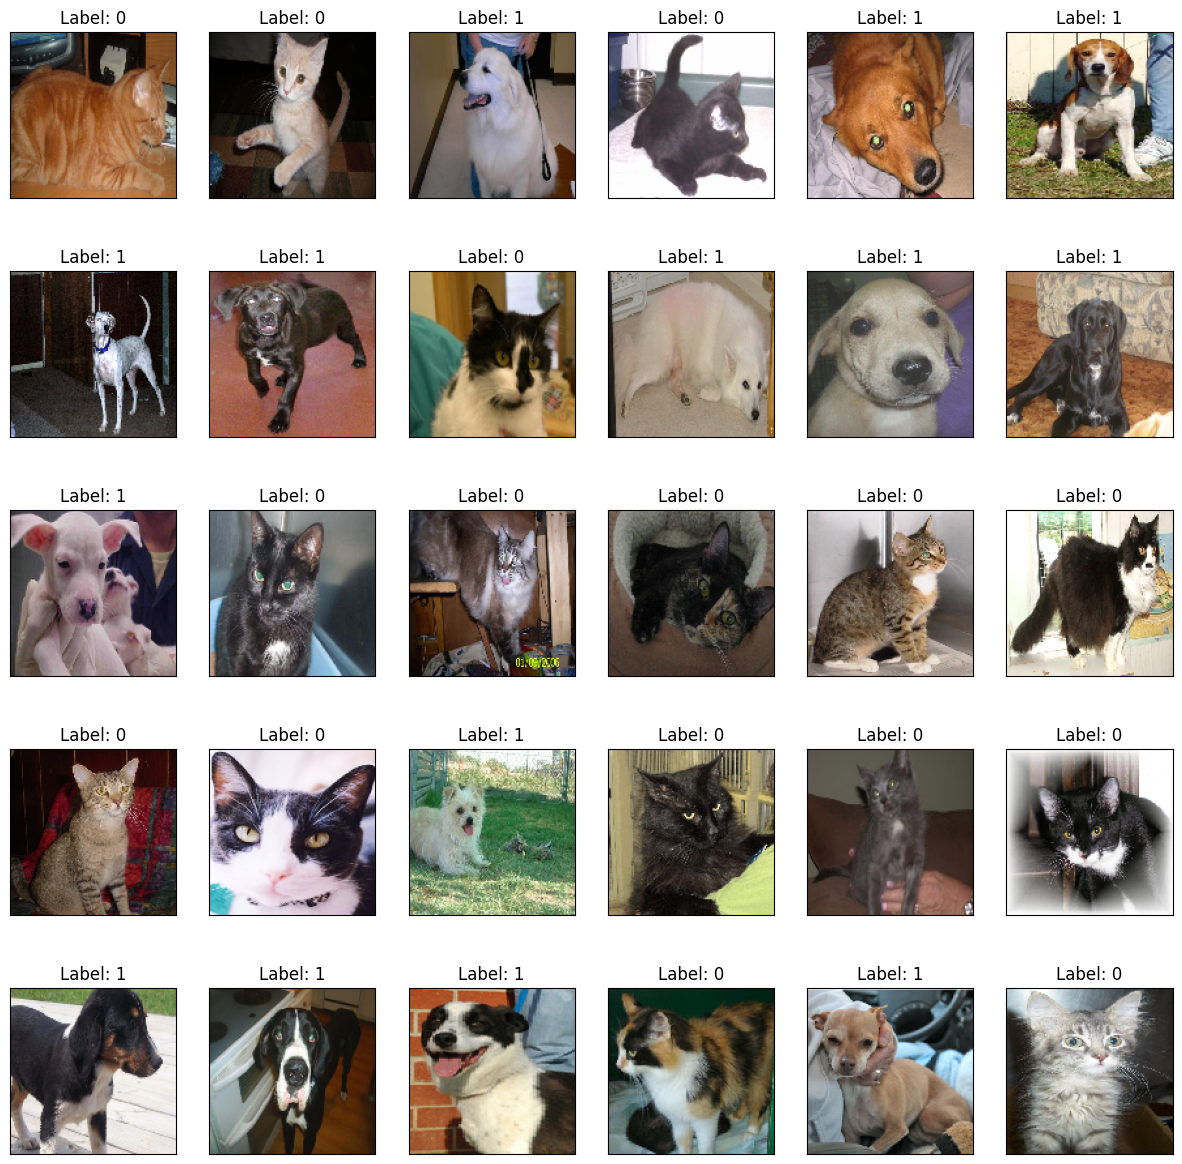

In [97]:
import random
import matplotlib.pyplot as plt

# Hacer prueba en 30 individuos aleatorios
random_indices = random.sample(range(len(train_images)), 30)

plt.figure(figsize=(15, 15))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 6, i + 1)
    plt.imshow(train_images[idx])
    plt.title(f"Label: {train_labels[idx]}")
    plt.xticks([])
    plt.yticks([])

plt.show()